# Notebook for Topic 3 - Parameters

<hr style="border-top: 1px solid #001a79;" />

## Exercise 1

Use numpy's polyfit to fit polynomials to the following two data sets.

Data Set 1:

x1 = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]<br>
y1 = [1.3, 1.2, 9.4, 27.3, 63.1, 126.5, 217.3, 341.5, 512.8, 729.3, 1001.8, 1332.7, 1728.9, 2198.8, 2743.7, 3376.7]

Data Set 2:

x2 = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]<br>
y2 = [5.7, 16.6, 58.0, 278.9, 1069.3, 3181.4, 7844.3, 16883.9, 32854.9, 59144.2, 100106.7, 161166.3, 248958.6]

In [1]:
# Import all used libraries

# Numpy for numerical arrays
import numpy as np

# matplotlib for plots
import matplotlib.pyplot as plt

# import curve fitting function from SciPy
from scipy.optimize import curve_fit

___
### Fit Data Set 1

In [2]:
# Define values for Data Set 1:
x1 = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]
y1 = [1.3, 1.2, 9.4, 27.3, 63.1, 126.5, 217.3, 341.5, 512.8, 729.3, 1001.8, 1332.7, 1728.9, 2198.8, 2743.7, 3376.7]

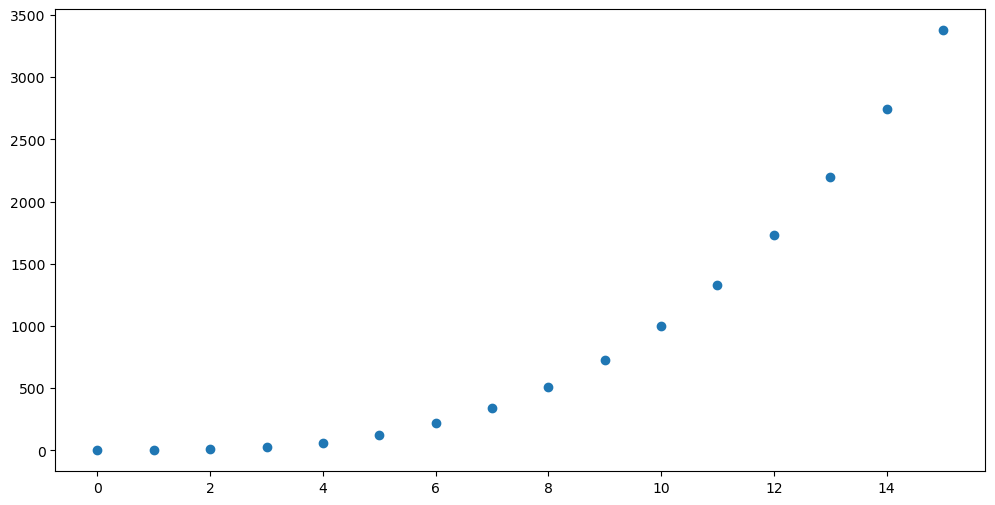

In [3]:
# Create a plot to visualize Data Set 1
fig, ax = plt.subplots(figsize=(12,6))

# Plot x1 vs y1:
ax.scatter(x1, y1);

In [4]:
# From the plot above, relationship appears to be a quadratic function (y=a*x^2+b*x+c)
params1 = np.polyfit(x1, y1, 2)

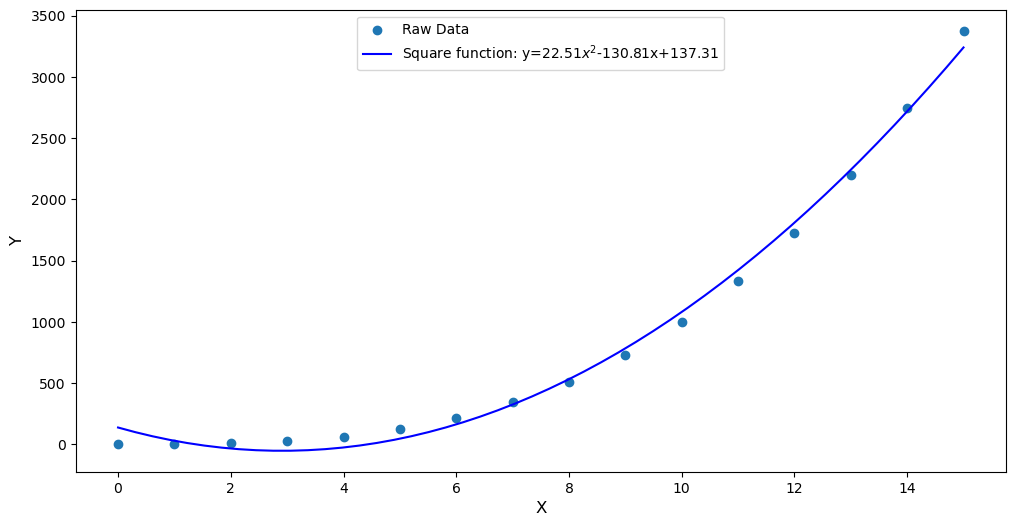

In [5]:
# Create a plot to visualize Data Set 1 with 2nd degree polynomial fit 
fig, ax = plt.subplots(figsize=(12,6))

# create x values for plot
x = np.linspace(min(x1), max(x1), 50)


# Set the X axis label
plt.xlabel('X', fontsize=12)
# Set the Y axis label
plt.ylabel('Y', fontsize=12)


# Plot Data Set 1 points:
ax.scatter(x1, y1, label="Raw Data");

# Plot quadratic function fit for Data Set 1:
ax.plot(x, params1[0] * x*x + params1[1] * x + params1[2], 'b-', 
        label='Square function: y={:.2f}$x^2${:.2f}x+{:.2f}'.format(params1[0], params1[1], params1[2])
       );

# Add the legend
plt.legend(loc='upper center');

Square function doesn't seems to fit Data Set 1 too well. Below we will try fitting data using higher order polynomials

In [6]:
# Trying 3rd degree polynomial (y=a*x^3+b*x^2+c*x+d)
params3 = np.polyfit(x1, y1, 3)

# Trying 4th degree polynomial (y=a*x^4+b*x^3+c*x^2+d*x+e)
params4 = np.polyfit(x1, y1, 4)

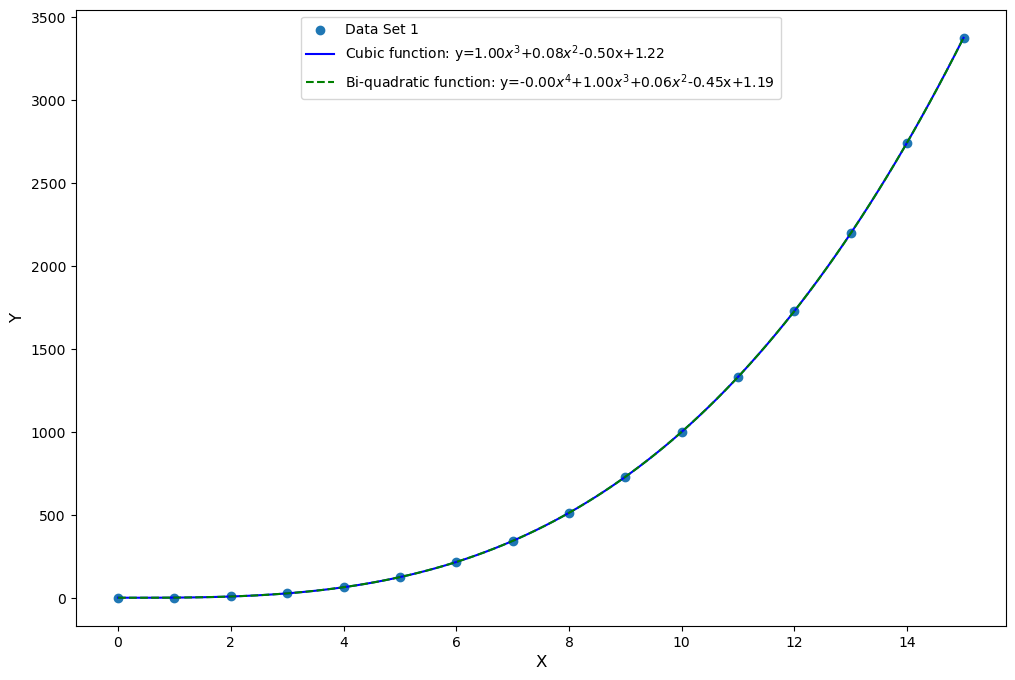

In [7]:
# Create a plot to visualize Data Set 1 with 3rd and 4th degree polynomial fit
fig, ax = plt.subplots(figsize=(12,8))

# create x values for plot
x = np.linspace(min(x1), max(x1), 100)


# Set the X axis label
plt.xlabel('X', fontsize=12)
# Set the Y axis label
plt.ylabel('Y', fontsize=12)


# Plot Data Set 1 points:
ax.scatter(x1, y1, label="Data Set 1");

# Plot cubic function fit for Data Set 1:
ax.plot(x, np.polyval(params3, x), 'b-', 
        label='Cubic function: y={:.2f}$x^3$+{:.2f}$x^2${:.2f}x+{:.2f}'.format(params3[0], params3[1], params3[2], params3[3])
       );

# Plot bi-quadratic function fit for Data Set 1:
ax.plot(x, np.polyval(params4, x), 'g--',
        label='Bi-quadratic function: y={:.2f}$x^4$+{:.2f}$x^3$+{:.2f}$x^2${:.2f}x+{:.2f}'.format(params4[0], params4[1], params4[2], params4[3], params4[4])
       );

# Add the legend
plt.legend(loc='upper center');

Both, cubic and bi-quadratic functions seems to be fitting the Data Set reasonably well. Since cubic function is simplier and parameter for $x^4$ in bi-quadratic function is close to 0, better fitting function for the Data Set 1 is the cubic function: 'Cubic function: $y=1.00x^3+0.08x^2-0.50x+1.22$'

___
### Fit Data Set 2

In [8]:
# Define values for Data Set 2:
x2 = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]
y2 = [5.7, 16.6, 58.0, 278.9, 1069.3, 3181.4, 7844.3, 16883.9, 32854.9, 59144.2, 100106.7, 161166.3, 248958.6]

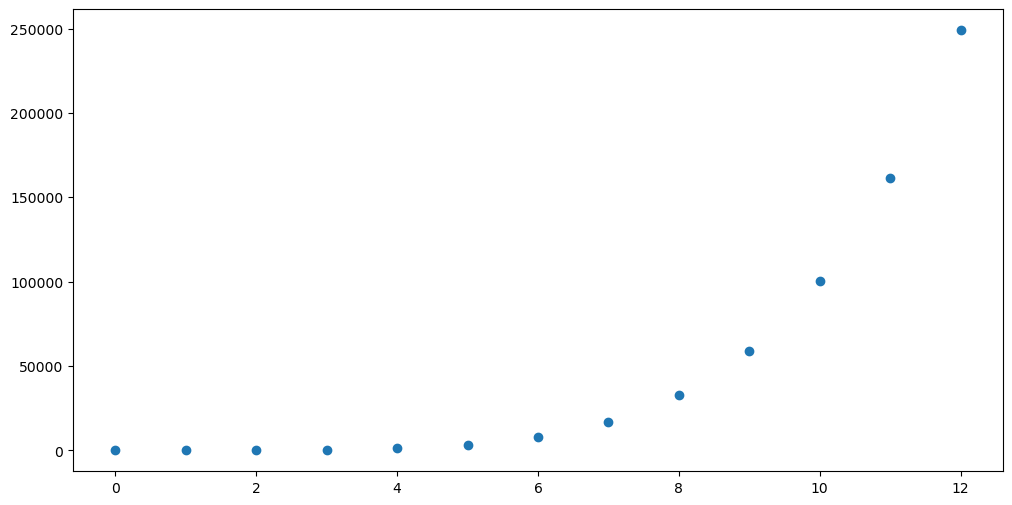

In [9]:
# Create a plot to visualize Data Set 2
fig, ax = plt.subplots(figsize=(12,6))

# Plot x2 vs y2:
ax.scatter(x2, y2);

Simirarly to Data Set 1, this dataset is not linear and can either be fited with one of the Polynomial functions or exponential function. We'll try polynomial functions first (up to 4th degree).

In [10]:
# Trying quadratic function (y=a*x^2+b*x+c)
params2 = np.polyfit(x2, y2, 2)

# Trying 3rd degree polynomial (y=a*x^3+b*x^2+c*x+d)
params3 = np.polyfit(x2, y2, 3)

# Trying 4th degree polynomial (y=a*x^4+b*x^3+c*x^2+d*x+e)
params4 = np.polyfit(x2, y2, 4)

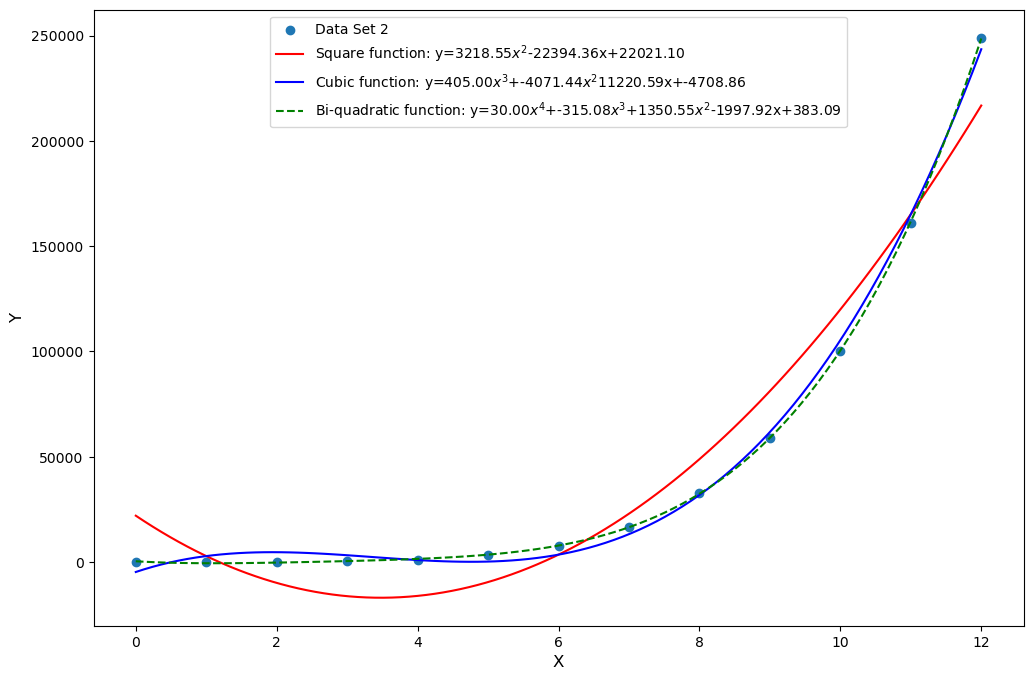

In [11]:
# Create a plot to visualize Data Set 1 with 3rd and 4th degree polynomial fit
fig, ax = plt.subplots(figsize=(12,8))

# create x values for plot
x = np.linspace(min(x2), max(x2), 100)


# Set the X axis label
plt.xlabel('X', fontsize=12)
# Set the Y axis label
plt.ylabel('Y', fontsize=12)


# Plot Data Set 1 points:
ax.scatter(x2, y2, label="Data Set 2");

# Plot cubic function fit for Data Set 1:
ax.plot(x, np.polyval(params2, x), 'r-',
        label='Square function: y={:.2f}$x^2${:.2f}x+{:.2f}'.format(params2[0], params2[1], params2[2])
       );

# Plot cubic function fit for Data Set 1:
ax.plot(x, np.polyval(params3, x), 'b-',
        label='Cubic function: y={:.2f}$x^3$+{:.2f}$x^2${:.2f}x+{:.2f}'.format(params3[0], params3[1], params3[2], params3[3])
       );

# Plot bi-quadratic function fit for Data Set 1:
ax.plot(x, np.polyval(params4, x), 'g--',
        label='Bi-quadratic function: y={:.2f}$x^4$+{:.2f}$x^3$+{:.2f}$x^2${:.2f}x+{:.2f}'.format(params4[0], params4[1], params4[2], params4[3], params4[4])
       );

# Add the legend
plt.legend(loc='upper center');

Out of 3 used functions, Bi-quadratic function seems to fit the Data Set 2 the best.

#### Let's try to use exponential function to fit the data

In [12]:
# SciPy.Optimize function used as per the following blog:
# As per https://rowannicholls.github.io/python/curve_fitting/exponential.html 

popt, pcov = curve_fit(lambda t, a, b, c: a * np.exp(b * t) + c, x2, y2)

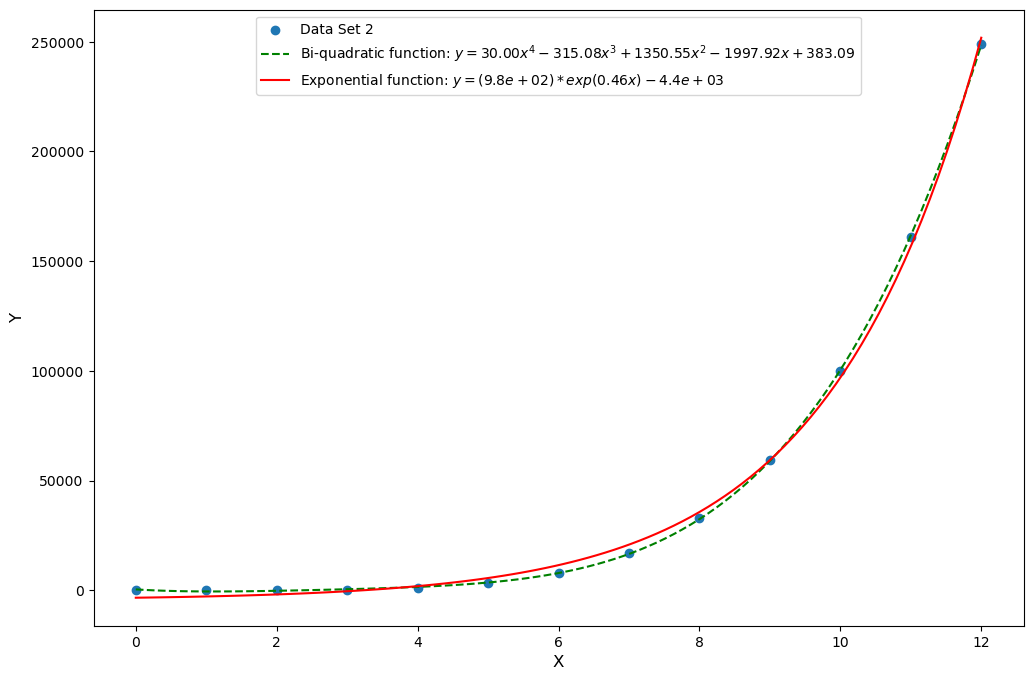

In [13]:
# Create a plot to visualize Data Set 1 with 3rd and 4th degree polynomial fit
fig, ax = plt.subplots(figsize=(12,8))

# create x values for plot
x = np.linspace(min(x2), max(x2), 100)


# Set the X axis label
plt.xlabel('X', fontsize=12)
# Set the Y axis label
plt.ylabel('Y', fontsize=12)


# Plot Data Set 1 points:
ax.scatter(x2, y2, label="Data Set 2");

# Plot bi-quadratic function fit for Data Set 1:
ax.plot(x, np.polyval(params4, x), 'g--',
        label='Bi-quadratic function: $y={:.2f}x^4{:.2f}x^3+{:.2f}x^2{:.2f}x+{:.2f}$'.format(params4[0], params4[1], params4[2], params4[3], params4[4])
       );

# Plot bi-quadratic function fit for Data Set 1:
ax.plot(x, popt[0] * np.exp(popt[1] * x) + popt[2], 'r-',
        label="Exponential function: $y=({:.2})*exp({:.2}x) {:.2}$".format(popt[0], popt[1], popt[2])
       );

# Add the legend
plt.legend(loc='upper center');

From the plot above it's clearly visible that the bi-qadratic function is a better fit for Data Set 2 than the exponential function. Therefore, the final function to fit Data Set 2 is: $y=30.00x^4-315.08x^3+1350.55x^2-1997.92x+353.09$

# End